In [1]:
from glob import glob
import warnings

warnings.filterwarnings("ignore")

In [2]:
all_systems = glob("../data/combined/*.fits")
all_systems[:4]

['../data/combined\\kplr001026032.fits',
 '../data/combined\\kplr001026957.fits',
 '../data/combined\\kplr001161345.fits',
 '../data/combined\\kplr001432214.fits']

In [3]:
from pipeline.preproc import read
df = read("../data/combined/kplr001433410.fits")
df

,time,flux
0,1274.140307,18193.189453
1,1274.160741,19470.533203
2,1274.181176,20208.191406
3,1274.201610,20492.765625
4,1274.222044,20343.445312
...,...,...
9532,1471.054355,30102.269531
9533,1471.074788,30637.986328
9534,1471.095221,30487.705078
9535,1471.115654,29734.013672


<AxesSubplot:title={'center':'Light Curve'}, xlabel='Time (days)', ylabel='Flux (electrons/second)'>

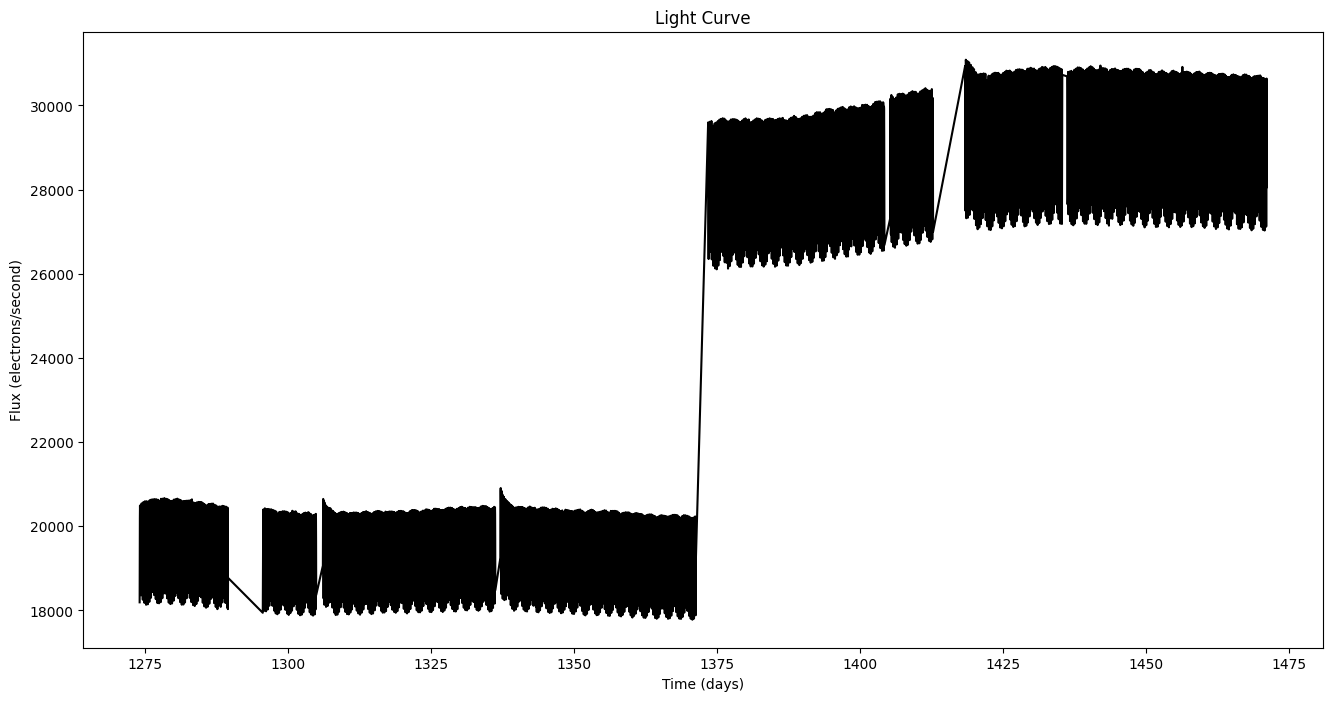

In [4]:
df.plot(
    x="time", y="flux", color="black",
    title="Light Curve", xlabel = 'Time (days)', ylabel = 'Flux (electrons/second)',
    figsize=(16, 8), legend=False
)

<AxesSubplot:title={'center':'Detrended Light Curve'}, xlabel='Time (days)', ylabel='Detrended Flux (electrons/second)'>

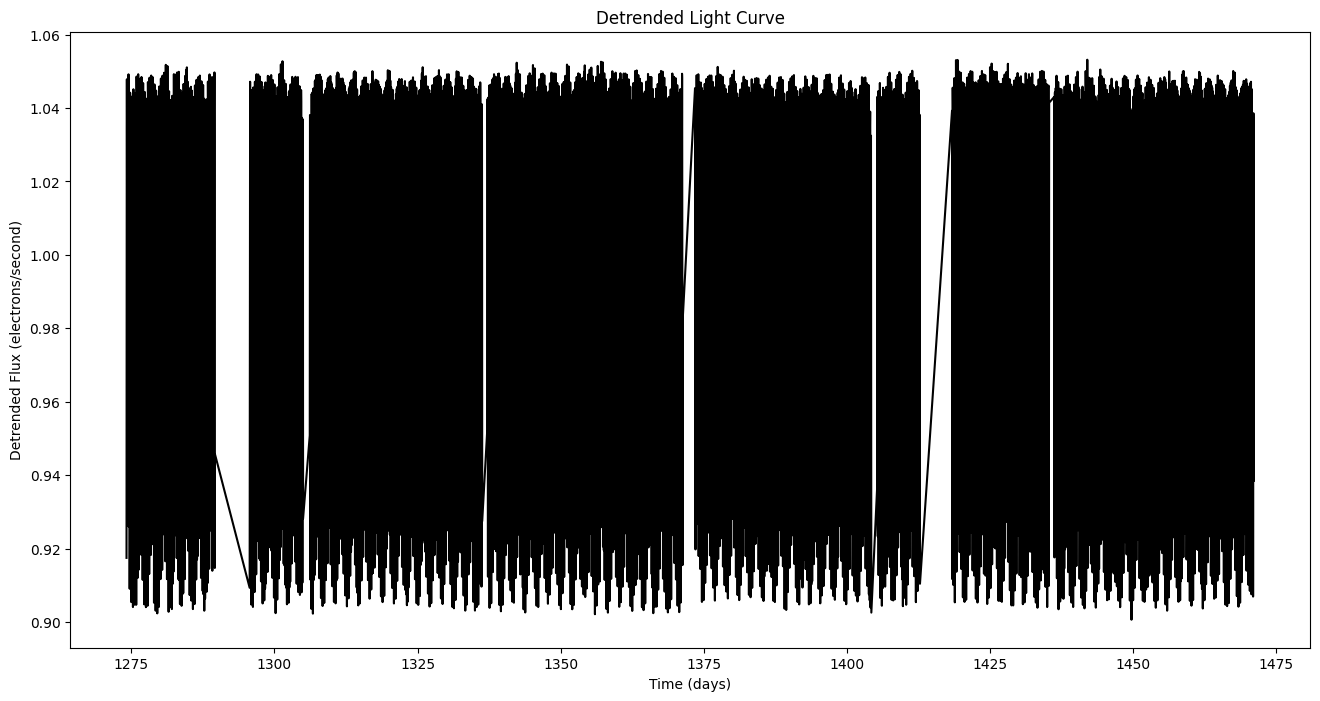

In [5]:
from pipeline.preproc import detrend
df = detrend(df)

df.plot(
    x="time", y="flux", color="black",
    title="Detrended Light Curve", xlabel = 'Time (days)', ylabel = 'Detrended Flux (electrons/second)',
    figsize=(16, 8), legend=False
)

In [6]:
from pipeline.eclipses import find_eclipse_timings

timings = find_eclipse_timings(df)
timings

,time,duration,delta
0,1.000000,0.040869,0.143041
1,1.143041,0.040869,0.143041
2,1.286081,0.040869,0.143041
3,1.429122,0.040869,0.153258
4,1.582379,0.020434,0.132823
...,...,...,...
1258,197.025206,0.020433,0.143030
1259,197.168236,0.020433,0.143030
1260,197.311267,0.020433,0.143030
1261,197.454297,0.020433,0.143030


<AxesSubplot:title={'center':'Eclipse Timing Variations'}, xlabel='Time (days)', ylabel='Change in Eclipse Time'>

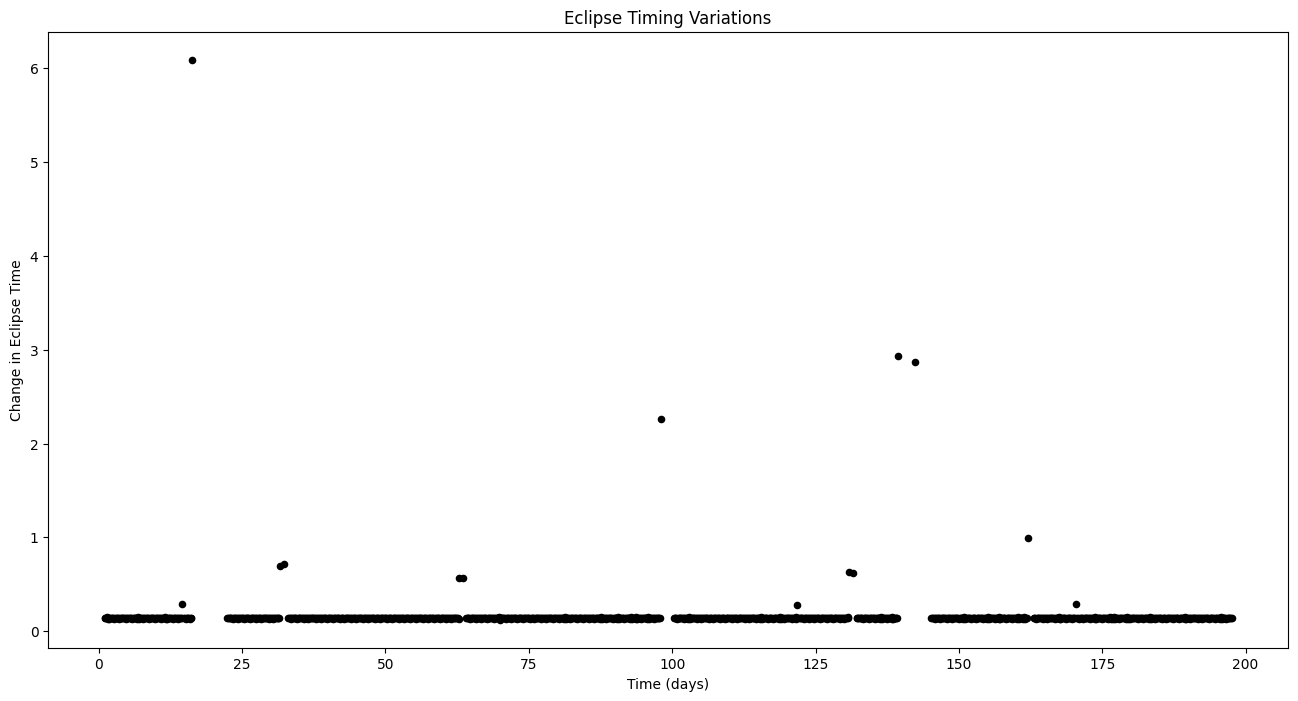

In [7]:
timings.plot.scatter(
    x = "time", y="delta", color="black",
    title="Eclipse Timing Variations", xlabel = 'Time (days)', ylabel = 'Change in Eclipse Time',
    figsize=(16, 8), legend=False
)

In [8]:
from pipeline.filter import complete_filter
timings, diagnostics = complete_filter(timings, return_diagnostics=True)
timings

,time,duration,delta
0,1.000000,0.040869,0.143041
1,1.143041,0.040869,0.143041
2,1.286081,0.040869,0.143041
3,1.429122,0.040869,0.153258
4,1.582379,0.020434,0.132823
...,...,...,...
1243,197.025206,0.020433,0.143030
1244,197.168236,0.020433,0.143030
1245,197.311267,0.020433,0.143030
1246,197.454297,0.020433,0.143030


In [9]:
diagnostics

(0, 15, False, 0)

<AxesSubplot:title={'center':'Eclipse Timing Variations'}, xlabel='Time (days)', ylabel='Change in Eclipse Time'>

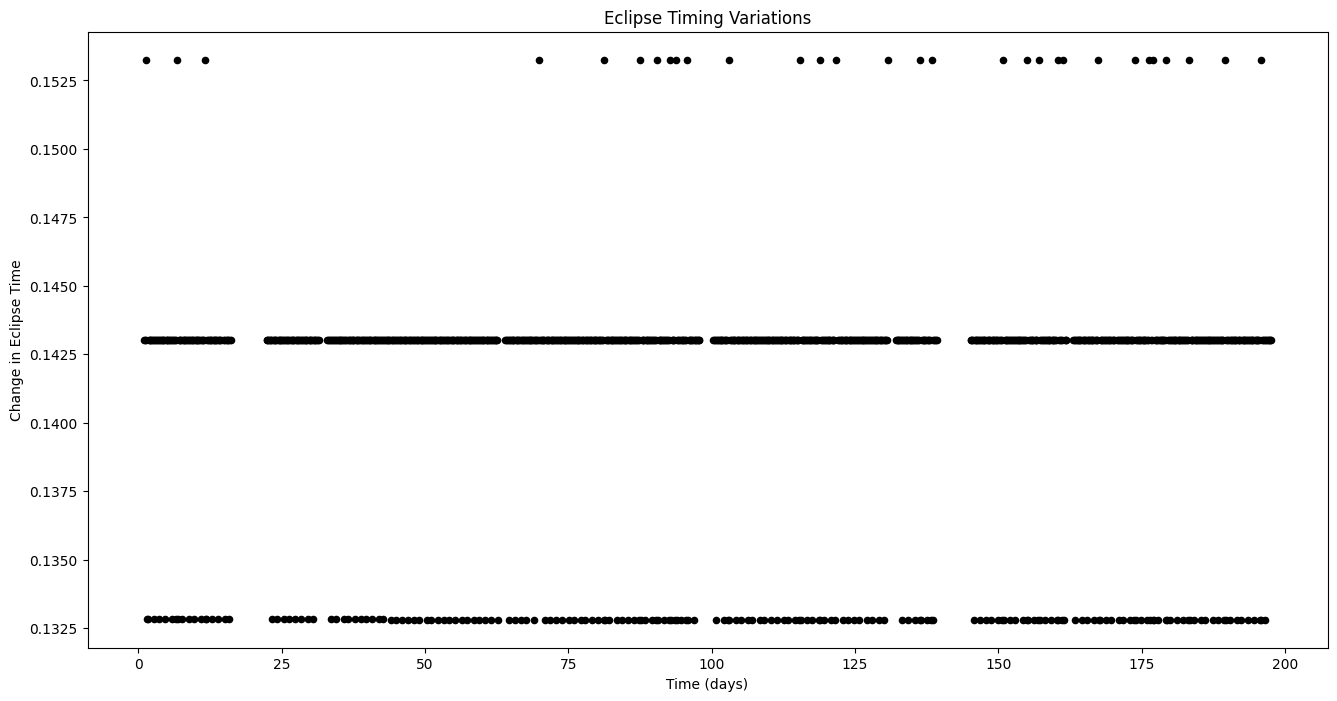

In [10]:
timings.plot.scatter(
    x = "time", y="delta", color="black",
    title="Eclipse Timing Variations", xlabel = 'Time (days)', ylabel = 'Change in Eclipse Time',
    figsize=(16, 8), legend=False
)

In [11]:
from pipeline.oc import get_oc
oc, period = get_oc(timings)
oc

,time,duration,delta,residuals
0,1.000000,0.040869,0.143041,0.000000
1,1.143041,0.040869,0.143041,-0.000097
2,1.286081,0.040869,0.143041,-0.000194
3,1.429122,0.040869,0.153258,-0.000291
4,1.582379,0.020434,0.132823,0.009829
...,...,...,...,...
1243,197.025206,0.020433,0.143030,0.069942
1244,197.168236,0.020433,0.143030,0.069835
1245,197.311267,0.020433,0.143030,0.069728
1246,197.454297,0.020433,0.143030,0.069621


In [12]:
period

0.14313751910940464

<AxesSubplot:title={'center':'O-C Curve'}, xlabel='Time (days)', ylabel='Residuals'>

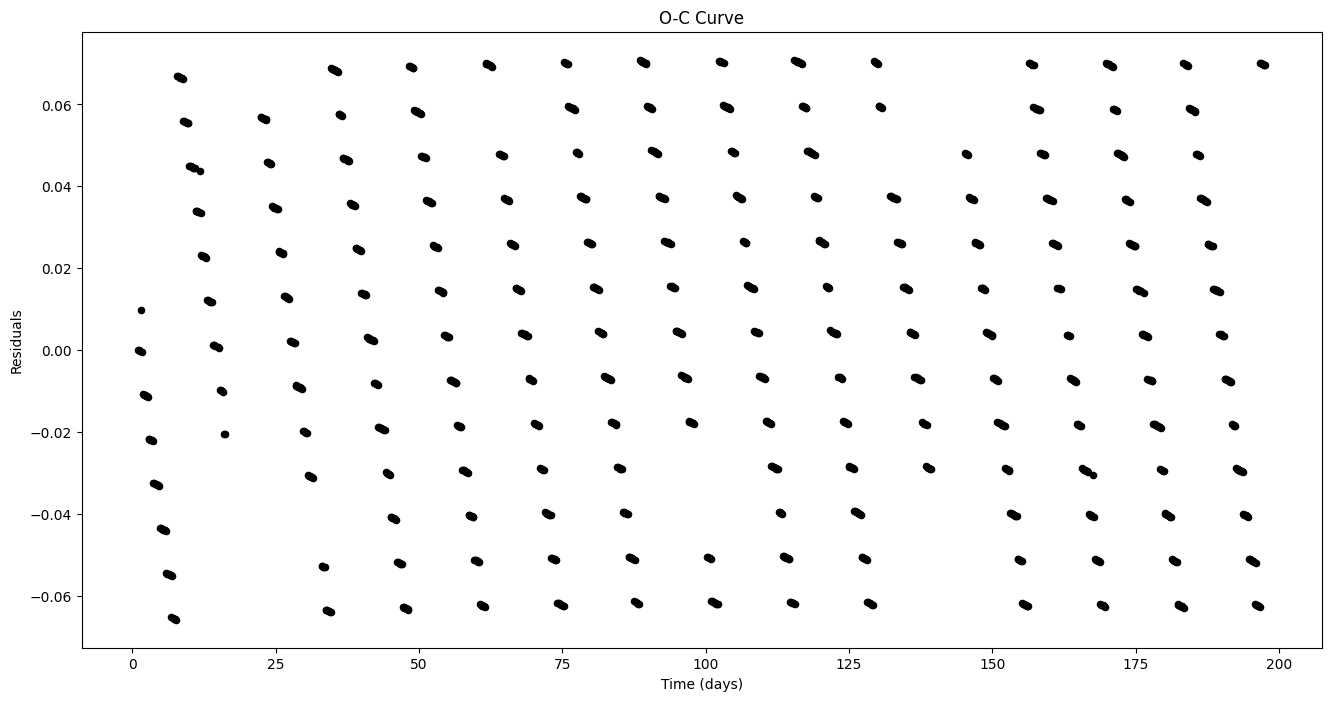

In [13]:
oc.plot.scatter(
    x = "time", y="residuals", color="black",
    title="O-C Curve", xlabel = 'Time (days)', ylabel = 'Residuals',
    figsize=(16, 8), legend=False
)

In [14]:
from pipeline.periodic import remove_periodic_noise
oc = remove_periodic_noise(oc)
oc

,time,duration,delta,residuals
0,1.000000,0.040869,0.143041,-0.012233
1,1.143041,0.040869,0.143041,-0.012146
2,1.286081,0.040869,0.143041,-0.012053
3,1.429122,0.040869,0.153258,-0.011956
4,1.582379,0.020434,0.132823,-0.011853
...,...,...,...,...
1243,197.025206,0.020433,0.143030,-0.012594
1244,197.168236,0.020433,0.143030,-0.012532
1245,197.311267,0.020433,0.143030,-0.012465
1246,197.454297,0.020433,0.143030,-0.012393


<AxesSubplot:title={'center':'(Culled) O-C Curve'}, xlabel='Time (days)', ylabel='(Culled) Residuals'>

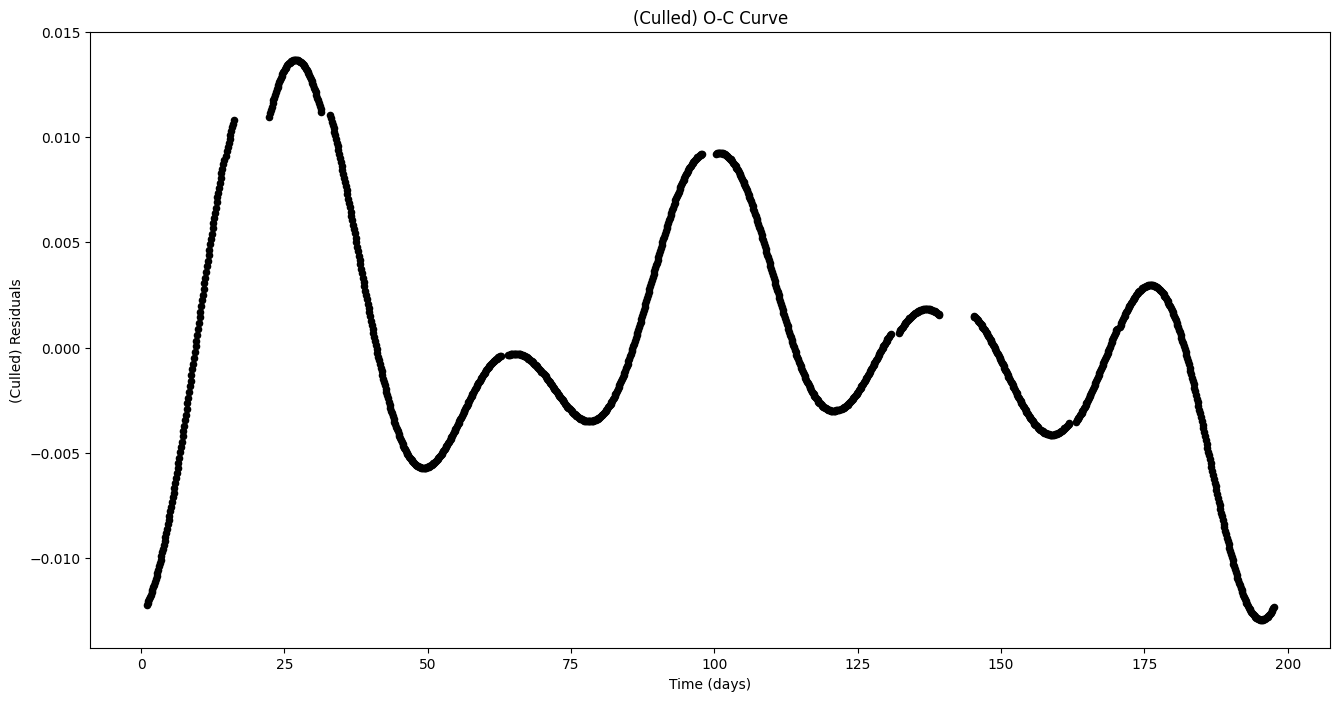

In [15]:
oc.plot.scatter(
    x = "time", y="residuals", color="black",
    title="(Culled) O-C Curve", xlabel = 'Time (days)', ylabel = '(Culled) Residuals',
    figsize=(16, 8), legend=False
)

In [16]:
from pipeline.core import ideal_pipeline

oc, period = ideal_pipeline("../data/combined/kplr001433410.fits")
oc

,time,duration,delta,residuals
0,1.000000,0.040869,0.143041,-0.013133
1,1.143041,0.040869,0.143041,-0.013058
2,1.286081,0.040869,0.143041,-0.012977
3,1.429122,0.040869,0.153258,-0.012889
4,1.582379,0.020434,0.132823,-0.012794
...,...,...,...,...
1240,197.025206,0.020433,0.143030,-0.013405
1241,197.168236,0.020433,0.143030,-0.013364
1242,197.311267,0.020433,0.143030,-0.013316
1243,197.454297,0.020433,0.143030,-0.013262


<AxesSubplot:title={'center':'O-C Curve'}, xlabel='Time (days)', ylabel='Residuals'>

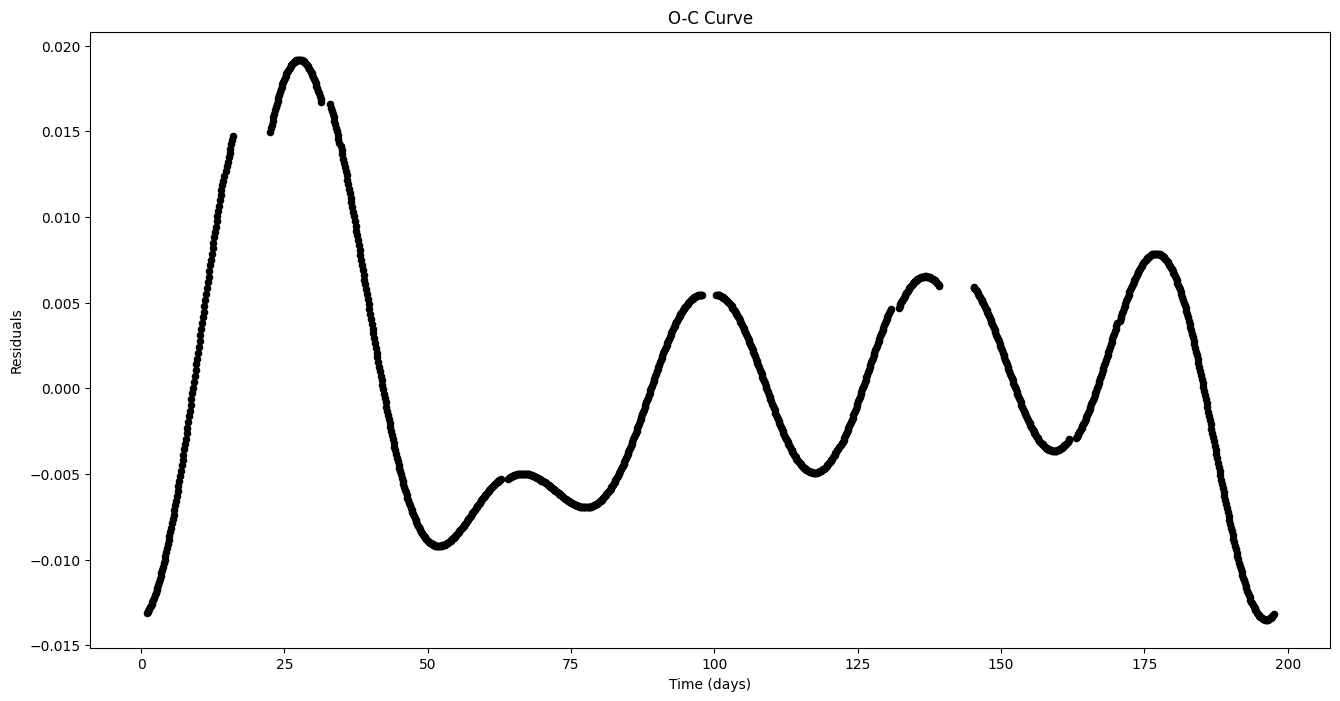

In [17]:
oc.plot.scatter(
    x = "time", y="residuals", color="black",
    title="O-C Curve", xlabel = 'Time (days)', ylabel = 'Residuals',
    figsize=(16, 8), legend=False
)